<a href="https://colab.research.google.com/github/pedrogomez97/IDAL_IA3_UV/blob/main/PENGUIN_EJERCICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LogisticRegression
# import all the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px
# import date set
np.random.seed(123)
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1:]
# Duumies and delete extra columns
X_=pd.get_dummies(X)
Y_=pd.get_dummies(Y).to_numpy()
Y_=Y_[:,0]

X_
Y_

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
model = LogisticRegression(max_iter= 1000)

In [ ]:
(X_test, X_train, Y_test, Y_train) = train_test_split(X_, Y_, test_size=0.5)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_train, Y_train)

0.844311377245509

In [ ]:
model.score(X_test, Y_test)

0.8192771084337349

In [ ]:
#Logistics Regression number 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_,Y_,test_size=0.2, random_state=13)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[27  6]
 [ 2 32]]


In [ ]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.84      0.94      0.89        34

    accuracy                           0.88        67
   macro avg       0.89      0.88      0.88        67
weighted avg       0.89      0.88      0.88        67



ROC CURVE


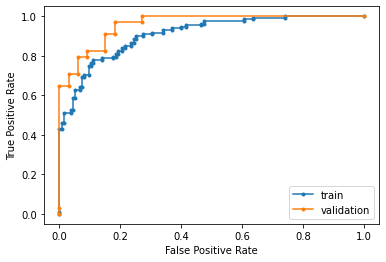

In [ ]:
from matplotlib import pyplot as plt

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()